<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/05_1_%7C_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀로 와인 분류하기

In [ ]:
# 데이터 불러오기
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


class가 0이면 레드 와인, 1이면 화이트 와인   
전체 와인 데이터에서 화이트 와인을 골라내야 함

In [ ]:
# 데이터 확인하기
wine.info() ## 각 열의 데이터 타입과 누락된 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
 wine.describe() ## 열에 대한 간략한 통계(최소,최대,평균값)

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# alcohol과 sugar, 그리고 pH 값의 스케일이 다르므로, StandardScaler 클래스를 사용해 특성을 표준화
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)  ## 테스트 세트는 20%, test_size=0.2

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# StandardScaler 클래스를 사용해 훈련 세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


**결과는 과소적합**
- 규제 매개변수 C의 값을 바꿔볼까?
- solver 매개변수에서 다른 알고리즘 선택
- 다항 특성을 만들어 추가

In [ ]:
# 설명하기 쉬운 모델과 어려운 모델
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정 트리(Decision Tree)

In [ ]:
# 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))  ## 훈련세트
print(dt.score(test_scaled, test_target))   ## 테스트 세트

0.996921300750433
0.8592307692307692


train.score > test.score   
**결과는 과대적합**

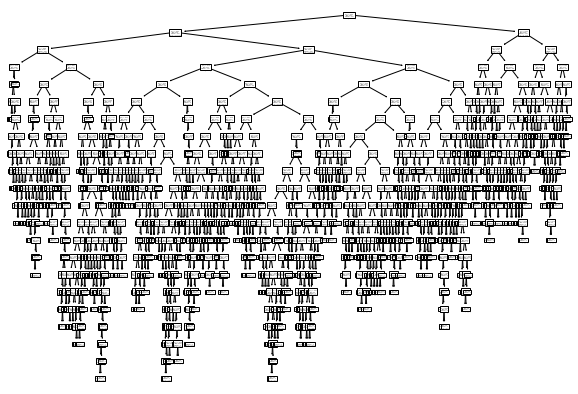

In [ ]:
# plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

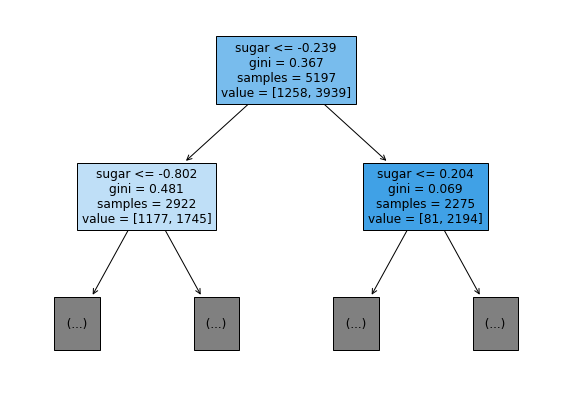

In [ ]:
# plot_tree() 함수에서 트리의 깊이를 제한해서 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
## max_depth 깊이, filled 노드의 색, feature_names 특성의 이름 전달

plt.show()

### **불순도**   
gini는 지니 불순도(Gini impurity)를 의미   
DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'   
criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것

*지니 불순도 = 1 - (음성 클래스 비율2 + 양성 클래스 비율2)*

</br>

결정 트리 모델은 부모 노드(parent node)와 자식 노드(child node)의 불순도 차이가 가능한 크도록 트리fmf 성장시킴   
부모와 자식 노드 사이의 불순도 차이를 **정보 이득(information gain)**이라고 부름

***

사이킷런에는 또 다른 불순도 기준이 있음  
DecisionTreeClassifier 클래스에서 criterion='entropy'를 지정하여 **엔트로피 불순도**를 사용   

*- 음성 클래스 비율 x log2(음성 클래스 비율) - 양성 클래스 비율 x log2(양성 클래스 비율)*

In [ ]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


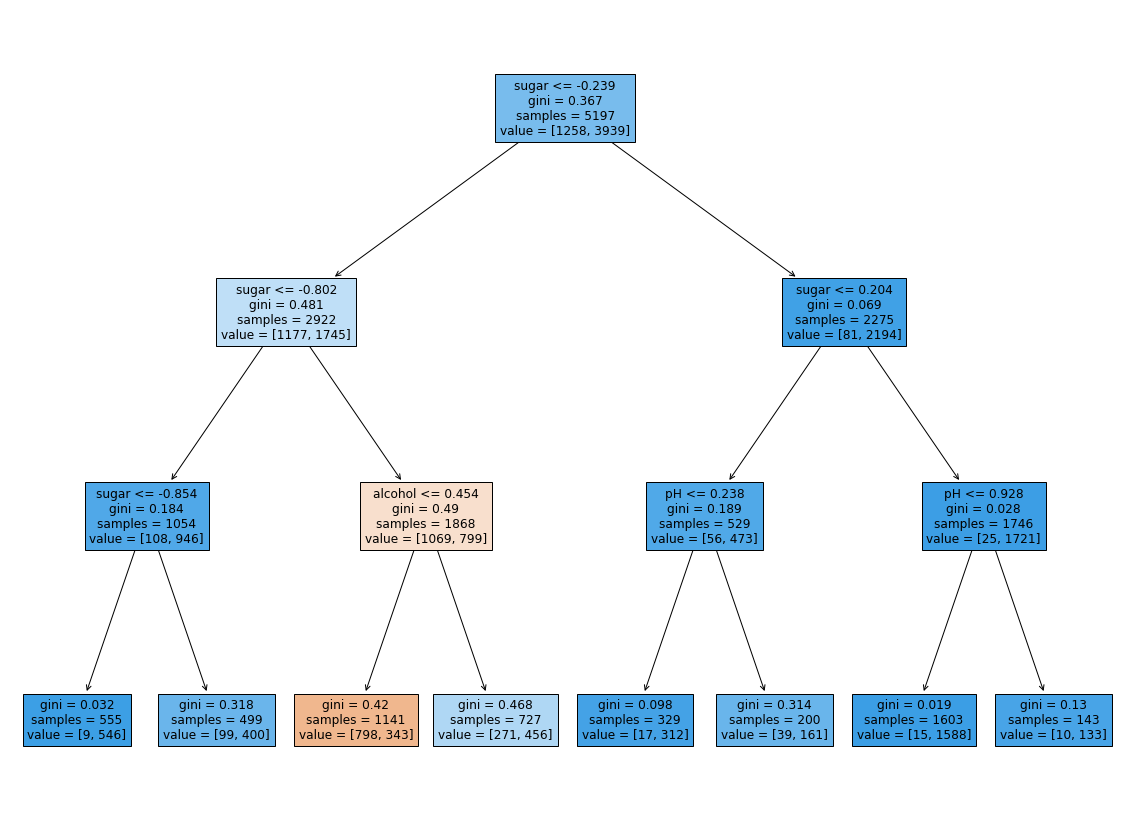

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# train_input과 test_input으로 결정 트리 모델을 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


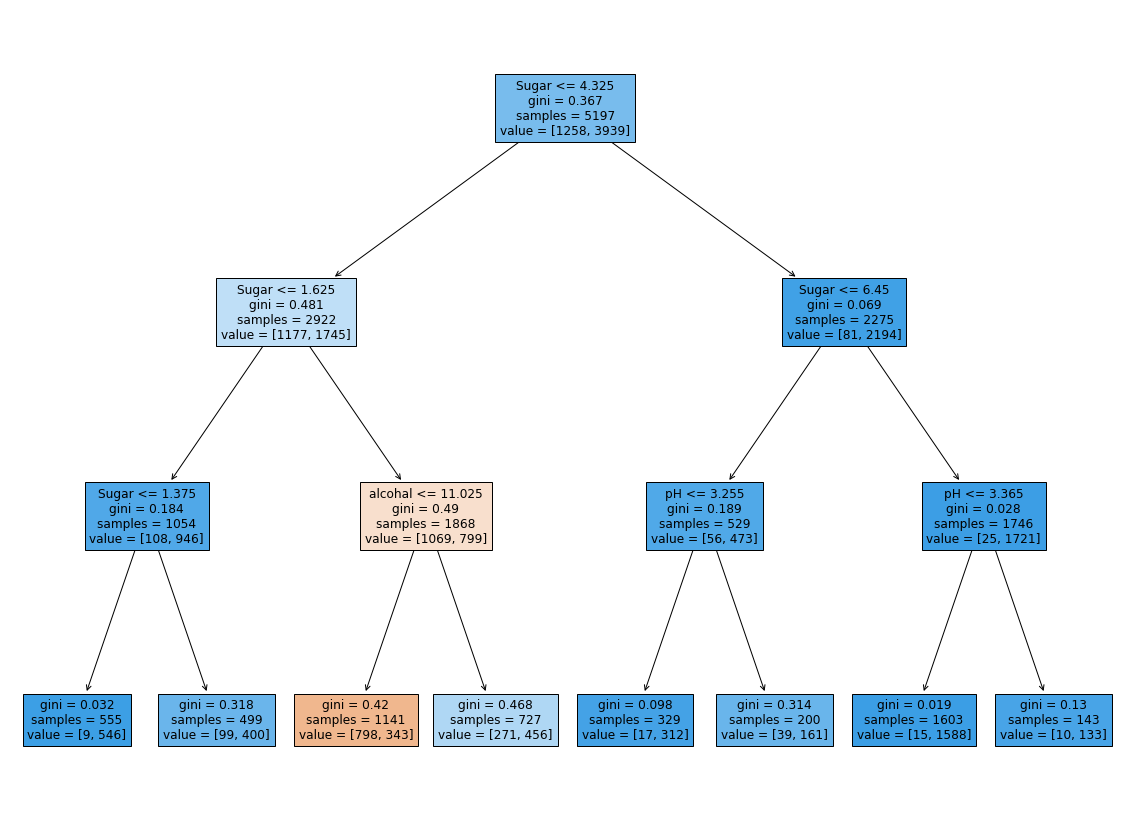

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohal','Sugar','pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
